# Wordcloud

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2


# Leemos el dataset

In [2]:
df = pd.read_csv('../data/train.csv').dropna(
    subset=['precio','metroscubiertos']
)

## Agregando frecuencia como feature

Nueva feature: frecuencia promedio de titulo y descripcion.
    
Intuicion: Inmuebles con titulos / descripciones con frecuencia promedio
similar pueden llegar a tener caracteristicas similares, por ejemplo el
precio.

In [3]:
import wordcloud_features as wf
desc_wc, titles_wc = wf.add_frequency_features(df)

Text(0.5, 1.0, 'WordCloud de titulos')

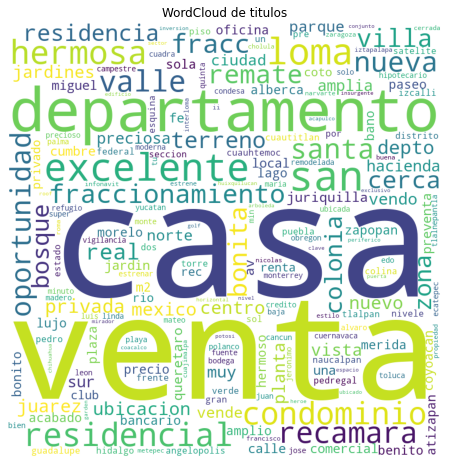

In [7]:
wf.plot_wc(titles_wc)
plt.title("WordCloud de titulos")

Text(0.5, 1.0, 'WordCloud de descripciones')

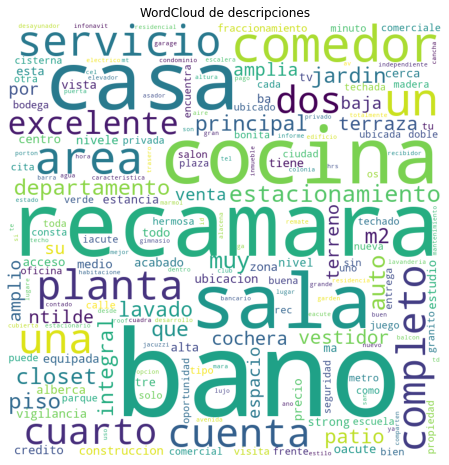

In [8]:
wf.plot_wc(desc_wc)
plt.title("WordCloud de descripciones")

Text(0.5, 1.0, 'Distribucion de frecuencias para titulo y descripcion')

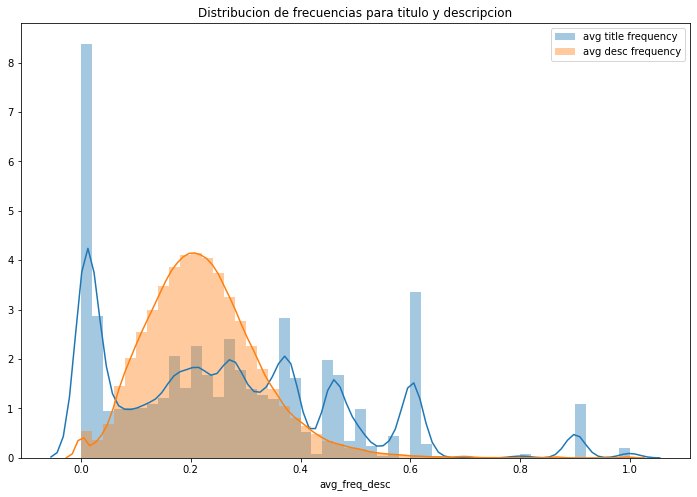

In [23]:
plt.subplots(1, 1, figsize=(12, 8))
sns.distplot(df['avg_freq_title'], label="avg title frequency")
sns.distplot(df['avg_freq_desc'], label="avg desc frequency")
plt.legend()
plt.title("Distribucion de frecuencias para titulo y descripcion")